In [36]:
# importing google drive or mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('/content/drive/MyDrive/supply_chain_analytics/data/supply_chain_data.csv')

In [39]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [40]:
df.shape

(100, 24)

In [41]:
df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [42]:
for col in df.columns:
  if df[col].dtype == 'object':
    unique_values = df[col].nunique()
    print(f'{col}: {unique_values} unique values (categorical)')
  else:
    print(f'{col}: {df[col].dtype} ^^ range: MIN: {df[col].min():.2f} MAX: {df[col].max():.2f}')


Product type: 3 unique values (categorical)
SKU: 100 unique values (categorical)
Price: float64 ^^ range: MIN: 1.70 MAX: 99.17
Availability: int64 ^^ range: MIN: 1.00 MAX: 100.00
Number of products sold: int64 ^^ range: MIN: 8.00 MAX: 996.00
Revenue generated: float64 ^^ range: MIN: 1061.62 MAX: 9866.47
Customer demographics: 4 unique values (categorical)
Stock levels: int64 ^^ range: MIN: 0.00 MAX: 100.00
Lead times: int64 ^^ range: MIN: 1.00 MAX: 30.00
Order quantities: int64 ^^ range: MIN: 1.00 MAX: 96.00
Shipping times: int64 ^^ range: MIN: 1.00 MAX: 10.00
Shipping carriers: 3 unique values (categorical)
Shipping costs: float64 ^^ range: MIN: 1.01 MAX: 9.93
Supplier name: 5 unique values (categorical)
Location: 5 unique values (categorical)
Lead time: int64 ^^ range: MIN: 1.00 MAX: 30.00
Production volumes: int64 ^^ range: MIN: 104.00 MAX: 985.00
Manufacturing lead time: int64 ^^ range: MIN: 1.00 MAX: 30.00
Manufacturing costs: float64 ^^ range: MIN: 1.09 MAX: 99.47
Inspection resu

In [43]:
df.head(1)
print(df.describe(include='all'))

       Product type   SKU       Price  Availability  Number of products sold  \
count           100   100  100.000000    100.000000               100.000000   
unique            3   100         NaN           NaN                      NaN   
top        skincare  SKU0         NaN           NaN                      NaN   
freq             40     1         NaN           NaN                      NaN   
mean            NaN   NaN   49.462461     48.400000               460.990000   
std             NaN   NaN   31.168193     30.743317               303.780074   
min             NaN   NaN    1.699976      1.000000                 8.000000   
25%             NaN   NaN   19.597823     22.750000               184.250000   
50%             NaN   NaN   51.239831     43.500000               392.500000   
75%             NaN   NaN   77.198228     75.000000               704.250000   
max             NaN   NaN   99.171329    100.000000               996.000000   

        Revenue generated Customer demo

In [44]:
cat_col = df.select_dtypes(include='object').columns
df[cat_col].head()
df['SKU'].nunique()


100

In [45]:
df['Product type'].dtype

dtype('O')

In [47]:
from sklearn.preprocessing import LabelEncoder
import pickle

le = LabelEncoder()
copy_df = df.copy()
for col in df[cat_col]:
  copy_df[col] = le.fit_transform(df[col].drop(columns=''))

with open('/content/drive/MyDrive/supply_chain_analytics/preprocessors/sku_encoder.pkl', 'wb') as f:
  pickle.dump(le, f)

In [54]:
mean = copy_df.mean(axis=0)
copy_df -= mean

std = copy_df.std(axis=0)

copy_df /= std

copy_df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,-0.174068,-1.706220,0.652766,0.214681,1.122556,1.056025,0.341278,0.326114,-1.019827,1.746537,...,1.304908,1.347463,-1.341358,1.596646,-0.034048,1.078952,-1.403309,0.599554,0.301245,-1.322073
1,1.069277,-1.671751,-1.110714,1.515777,0.905293,0.616520,-1.365112,0.166723,1.598033,-0.456235,...,1.304908,0.669210,-0.193274,1.708849,-0.470966,1.078952,1.763358,0.599554,0.301245,-0.101355
2,-0.174068,-1.292591,-1.223773,-0.468394,-1.491177,1.391117,1.194473,-1.490945,-0.678367,1.447856,...,1.304908,-0.574255,1.532655,1.372241,-0.572017,1.078952,1.576221,-1.303792,1.611006,-1.499508
3,1.069277,-0.913431,0.375411,0.637537,-1.244288,0.728468,0.341278,-0.789624,-0.336907,0.365138,...,0.607096,0.782252,1.403400,0.362415,-0.401684,-1.192526,1.689851,-0.352119,-1.008516,-1.062593
4,1.069277,-0.534271,-1.432774,-0.728614,1.349694,-1.130524,0.341278,-1.363432,-1.475107,0.253132,...,-0.090716,-1.365550,-0.584839,-1.320627,1.545689,-1.192526,0.594253,-1.303792,-1.008516,1.526102


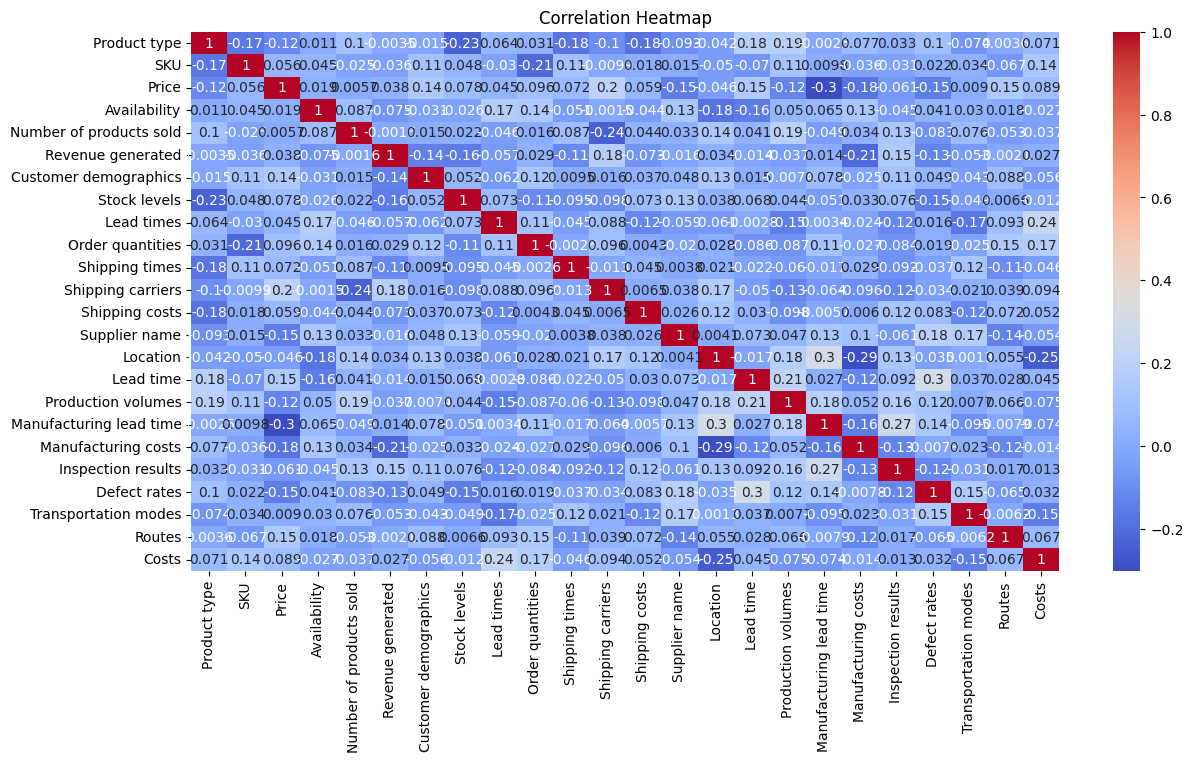

<Figure size 640x480 with 0 Axes>

In [52]:
correlation = copy_df.corr()
plt.figure(figsize=(14, 7))

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('corre.png')

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [57]:
help(tf.DType.to_tensors)

Help on function to_tensors in module tensorflow.python.framework.dtypes:

to_tensors(self, value)
    See tf.types.experimental.TraceType base class.



In [48]:
copy_df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,1,0,69.808006,55,802,8661.996792,2,58,7,96,...,4,29,215,29,46.279879,2,0.226410,2,1,187.752075
1,2,1,14.843523,95,736,7460.900065,0,53,30,37,...,4,23,517,30,33.616769,2,4.854068,2,1,503.065579
2,1,12,11.319683,34,8,9577.749626,3,1,10,88,...,4,12,971,27,30.688019,2,4.580593,0,2,141.920282
3,2,23,61.163343,68,83,7766.836426,2,23,13,59,...,3,24,937,18,35.624741,0,4.746649,1,0,254.776159
4,2,34,4.805496,26,871,2686.505152,2,5,3,56,...,2,5,414,3,92.065161,0,3.145580,0,0,923.440632
